<a href="https://colab.research.google.com/github/ShohamWeiss/Statistics/blob/master/Sandboxes/Statistics_Linear_Regression_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
y = np.array([1, 1, 2, 3, 6, 5, 5,10, 14, 17, 19])
x = np.array(range(len(y)))

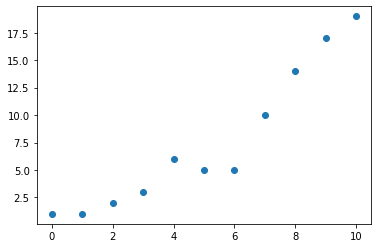

In [ ]:
plt.scatter(x, y)

# Simple Approach (Mx + b)

In [ ]:
# y = mx + b try to fit
# minimize the Sum Square Error = sum((y - yfit)^2)
# adjust m and b (gradient decent)

In [ ]:
def err(x,y,m,b):
  return sum((y - (m*x + b)) **2)

In [ ]:
m = np.arange(0,2,0.1)
b = 1.1
error = [err(x,y,m,b) for m in m]

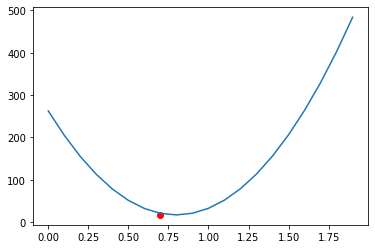

In [ ]:
plt.plot(m,error)
plt.scatter(0.7,min(error), color='r')

In [ ]:
m = 0.25
def hardGradientDescent(x, y, w, stepSize):
  newW = w.copy()
  minDeltaErr = 0
  for i in range(len(w)):
    testW = w.copy()
    save = testW[i]
    testW[i] = testW[i] + stepSize
    deltaErr = err(x, y, testW[0], testW[1]) - err(x,y,w[0],w[1])
    if (deltaErr < 0 and deltaErr < minDeltaErr):
      minDeltaErr = deltaErr
      newW = w.copy()
      newW[i] = testW[i]
  print(i, "newW: ", newW, "DErr: ", minDeltaErr)
  if (not np.array_equal(w,newW)):
    return hardGradientDescent(x,y,newW, stepSize)
  elif (stepSize > 0):
    return hardGradientDescent(x,y,newW, -stepSize)
  else:
    return w

In [ ]:
newWs = hardGradientDescent(x,y,[m,b], 0.05)
print(newWs)

1 newW:  [0.3, 1.1] DErr:  -20.162499999999994
1 newW:  [0.35, 1.1] DErr:  -18.237499999999983
1 newW:  [0.39999999999999997, 1.1] DErr:  -16.312499999999986
1 newW:  [0.44999999999999996, 1.1] DErr:  -14.387500000000017
1 newW:  [0.49999999999999994, 1.1] DErr:  -12.462499999999999
1 newW:  [0.5499999999999999, 1.1] DErr:  -10.537500000000001
1 newW:  [0.6, 1.1] DErr:  -8.612500000000004
1 newW:  [0.65, 1.1] DErr:  -6.687500000000007
1 newW:  [0.7000000000000001, 1.1] DErr:  -4.762500000000003
1 newW:  [0.7500000000000001, 1.1] DErr:  -2.837499999999988
1 newW:  [0.8000000000000002, 1.1] DErr:  -0.912500000000005
1 newW:  [0.8000000000000002, 1.1500000000000001] DErr:  -0.462499999999995
1 newW:  [0.8000000000000002, 1.2000000000000002] DErr:  -0.40750000000000064
1 newW:  [0.8000000000000002, 1.2500000000000002] DErr:  -0.3525000000000045
1 newW:  [0.8000000000000002, 1.3000000000000003] DErr:  -0.2974999999999959
1 newW:  [0.8000000000000002, 1.3500000000000003] DErr:  -0.2424999999

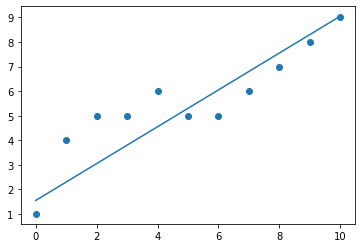

In [ ]:
plt.plot(x, newWs[0]*x + newWs[1])
plt.scatter(x,y)

# Medium Approach General

In [ ]:
# generalized Err func
def err(xs, ys, w, powerSteps = 1):
  totErr = 99999
  for j in range(len(x)):
    yPred = 0
    for i in range(len(w)):
      yPred += w[i]*(xs[j])**(i * powerSteps)
    totErr += (yPred - ys[j]) **(2)
  return totErr

In [ ]:
# generalize gradient descent func
def hardGradientDescent(x, y, w, stepSize, recTime = 0):
  if (recTime > 50):
    return w, err(x,y,w)
  newW = w.copy()
  minDeltaErr = 0
  for i in range(len(w)):
    testW = w.copy()
    save = testW[i]
    testW[i] = testW[i] + stepSize
    deltaErr = err(x, y, testW) - err(x,y,w)
    if (deltaErr < 0 and deltaErr < minDeltaErr):
      minDeltaErr = deltaErr
      newW = w.copy()
      newW[i] = testW[i]
  if (not np.array_equal(w,newW)):
    return hardGradientDescent(x,y,newW, stepSize, recTime = recTime + 1)
  elif (stepSize > 0):
    return hardGradientDescent(x,y,newW, -stepSize, recTime = recTime + 1)
  else:
    return w, err(x,y,w)

In [ ]:
# cant find global minima so going to do random walk for starting weights
w = [0,0,0]
minErr = err(x,y,w)
for i in np.arange(-2,2,0.5):
  for j in np.arange(-2,2,0.5):
    for k in np.arange(-2,2,0.5):
      newW, newErr = hardGradientDescent(x,y,[i,j,k], 0.01)
      if (newErr < minErr):
        w = newW
        minErr = newErr
        print(minErr)

260.77570000000014
188.3773000000001
131.35790000000003
86.88430000000005
54.93310000000004
35.50429999999999
28.597899999999996
26.8939
25.065099999999987
22.492299999999997
17.76849999999999
16.948299999999993
14.932300000000001
14.462800000000003
14.462800000000001


[1.0, -0.03, 0.18999999999999972]


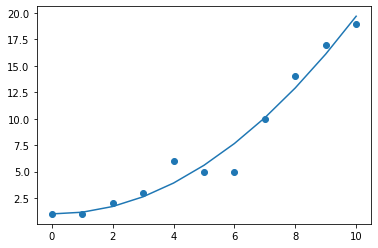

In [ ]:
print(w)
rightY = np.zeros(len(x))
for i in range(len(w)):
  rightY += w[i]*(x**(i))
plt.plot(x, rightY)
plt.scatter(x,y)

# Upper Medium Approach (add another variable if it fixes the error by more that threshold)

In [ ]:
def getY(x,w, powerSteps = 1):
  y = np.zeros(len(x))
  for i in range(len(w)):
    y += w[i]*(x**(i * powerSteps))
  return y

In [ ]:
def fit(x,y,threshold = 0.5, powerSteps = 1, lastDeltaErr = 2, w = [0], notBetterCount = 0, maxW = 10):
  oldErr = err(x,y,w,powerSteps=powerSteps)
  if (notBetterCount > 5 or len(w) > maxW):
    newY = getY(x,w, powerSteps=powerSteps)
    print(lastDeltaErr, oldErr)
    return newY, w
  if (lastDeltaErr < threshold):
    notBetterCount  = notBetterCount + 1
  else:
    notBetterCount = 0
  w.append(0)
  w, newErr = hardGradientDescent(x, y, w, 0.05, recTime = 0)
  print(len(w), newErr)
  return fit(x,y,lastDeltaErr=oldErr - newErr ,w = w, notBetterCount = notBetterCount)

2 66844996.432500005
3 61995104.129999995
4 29032530.532500014
5 258544.19250000006
6 247135.19249999974
7 230731.73249999993
8 220337.09249999988
9 205857.0525000001
10 196930.4925000003
11 188290.4324999997
8640.060000000609 188290.4324999997
[0, -11.550000000000031, 0.19999999999999968, 2.9499999999999975, 0.65, 0, 0, 0, 0, 0, 0]


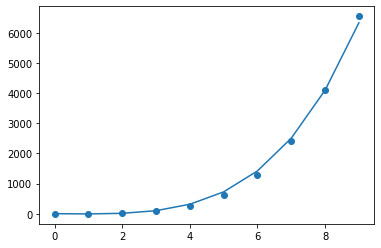

In [ ]:
predY, w = fit(x,y, powerSteps=1)
plt.scatter(x,y)
plt.plot(x,predY)
print(w)

new Data test

In [ ]:
x = np.array(range(10))
y = 10 + 0.5*x - 0.3*x**2 + x**4
predY, w = fit(x,y, powerSteps=1)

6 528261.5125000007
7 521011.9900000007
8 517468.8925000014
9 515863.4125000006
10 514387.982500001
11 513042.6025000011
1345.3799999998882 513042.6025000011


[7.649999999999981, 6.399999999999985, 0.9500000000000003, 0.05, 0.15000000000000002, 0.1, 0, 0, 0, 0, 0]


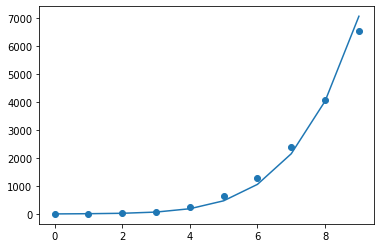

In [ ]:
plt.plot(x, predY)
plt.scatter(x,y)
print(w)

# Advanced Approach (give fit a function and its parameters)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# more generalized Err func
def err(xs, ys, w, fitFunc):
  totErr = 0
  for i in range(len(xs)):
    diff = (fitFunc(xs[i],w) - ys[i])
    totErr += (diff**2)
  return totErr

In [29]:
# generalize gradient descent func
def hardGradientDescent(x, y, w, fitFunc, stepSize = 1, minStepSize = 0.00001):
  newW = w.copy()
  minErr = err(x,y,w,fitFunc)
  newStepSize = stepSize
  while (abs(newStepSize) > minStepSize):
    for i in range(len(w)):
      testW = newW.copy()
      save = testW[i]
      testW[i] = testW[i] + newStepSize
      newErr = err(x,y,testW,fitFunc)
      if (newErr < minErr - 0.00001):
        minErr = newErr
        newW = testW.copy()
        print(newW, minErr)
    newStepSize = newStepSize / 2
  if (not np.array_equal(w,newW)):
    return hardGradientDescent(x,y,newW, fitFunc, stepSize= stepSize, minStepSize = minStepSize)
  elif (stepSize > 0):
    return hardGradientDescent(x,y,newW, fitFunc, stepSize= -1*stepSize, minStepSize = minStepSize)
  else:
    return w, err(x,y,newW, fitFunc)

In [30]:
def fit(x,y,w,fitFunc,threshold = 0.0001,):
  oldErr = err(x,y,w,fitFunc=fitFunc)
  deltaErr = 1000
  newW = w.copy()
  while(deltaErr > threshold):
    newW, newErr = hardGradientDescent(x, y, newW, fitFunc)
    deltaErr = oldErr - newErr
    oldErr = newErr
    print("NewErr: ", newErr, "deltaErr: ",deltaErr)
  newY = fitFunc(x,newW)
  return newY, newW

In [38]:
def myFunc(x,w):
  return np.sin(w[0]*x) + np.cos(w[1]*x)

In [41]:
x = np.array(range(100))
y = myFunc(x,[0.4,0.5])
predY, w = fit(x,y, [0.1,0.1], myFunc)

[1.1, 0.1] 172.8712276644345
[1.1, 0.35] 156.51596321664118
[1.1, 0.38125] 115.18483217377302
[1.1078125, 0.38125] 114.87332876546071
[1.1078125, 0.50625] 98.8195423643042
[0.8578125000000001, 0.50625] 98.57470913089534
[0.8500000000000001, 0.50625] 98.37036036709051
[0.8500000000000001, 0.50234375] 96.91912313568517
[0.6000000000000001, 0.50234375] 95.15571659531741
[0.4750000000000001, 0.50234375] 87.37774561420653
[0.4125000000000001, 0.50234375] 21.083813011381984
[0.3968750000000001, 0.50234375] 2.8412997955172234
[0.3968750000000001, 0.4984375] 1.652845351107894
NewErr:  1.652845351107894 deltaErr:  179.49143543448304
[0.4007812500000001, 0.4984375] 0.6059244841815207
[0.4007812500000001, 0.500390625] 0.09961313793242575
[0.3998046875000001, 0.500390625] 0.037121434447568186
[0.3998046875000001, 0.49990234375] 0.006287362238898779
NewErr:  0.006287362238898779 deltaErr:  1.6465579888689952
[0.4000488281250001, 0.49990234375] 0.0023332194011084066
[0.4000488281250001, 0.5000244140

[0.4000030517578126, 0.499993896484375]


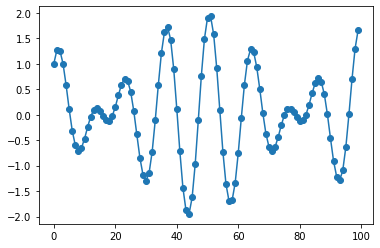

In [42]:
 plt.scatter(x,y)
plt.plot(x,predY)
print(w)